The Erdős–Rényi random graph

This model is symmetric, binary, and has two parameters, n and p. It codimensionsists of n nodes, and each of the $\frac{n(n − 1)}{2}$ possible edges is present with a probability p. In order to generate the adjacency matrix of such an Erdős–Rényi random graph:

1) Generate an empty adjacency matrix with zeros which has a size of n × n.

2) In a double for-loop, change $A_{ij}$ and $A_{ji}$ (for j > i) to one with probability of p.

a) Generate a Erdős–Rényi random graph and plot it, as shown in figure 12.2(a). Visualize a few examples for different values of n and p.

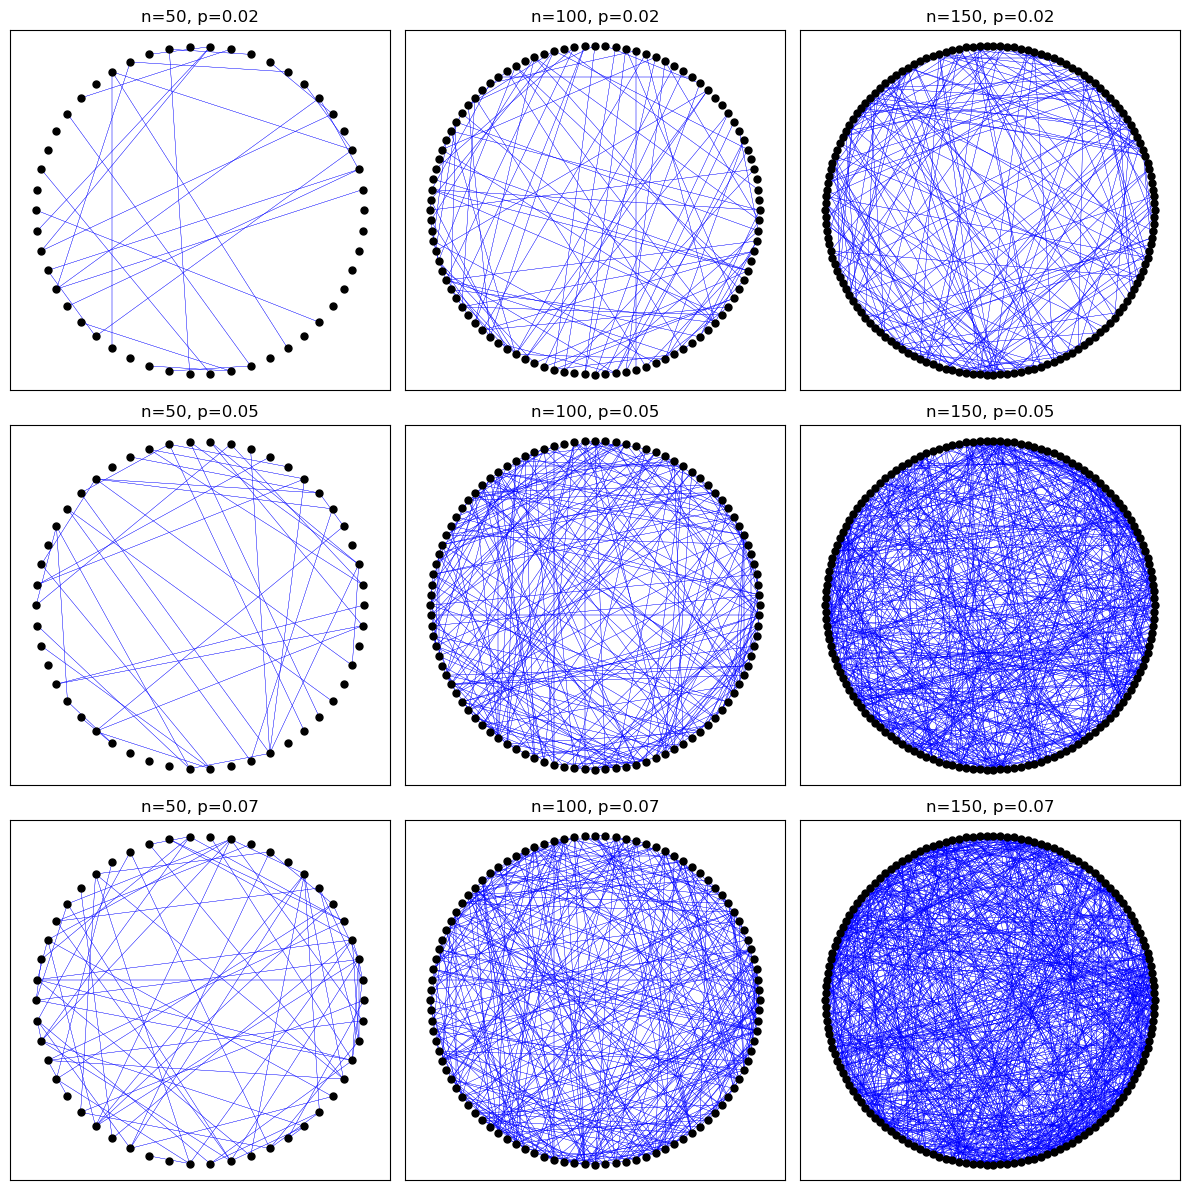

In [1]:
import numpy as np
import matplotlib.pyplot as plt

probabilities = [0.02, 0.05, 0.07]
dimensions = [50, 100, 150]

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Iterate over rows (p values)
for i, p in enumerate(probabilities):
    # Iterate over columns (n values)
    for j, n in enumerate(dimensions):
        
        adjMatrix = np.zeros((n, n))
        randMatrix = np.random.uniform(low=0.0, high=1.0, size=(n, n))

        for k in range(n):
            for l in range(k + 1, n):
                if randMatrix[k, l] <= p:
                    adjMatrix[k, l] = 1
                    adjMatrix[l, k] = 1

        
        theta = np.linspace(0, 2 * np.pi, n, endpoint=False)
        xCircle = np.cos(theta)
        yCircle = np.sin(theta)

        for k in range(n):
            for l in range(n):
                if adjMatrix[k, l] == 1:
                    axes[i, j].plot([xCircle[k], xCircle[l]], [yCircle[k], yCircle[l]], 'b-', linewidth=0.2)
                    
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

        axes[i, j].plot(xCircle, yCircle, 'ko', markersize=5)
        axes[i, j].axis('equal')
        axes[i, j].set_title(f'n={n}, p={p}')


plt.tight_layout()
plt.show()

b) Show that the probability that a generic node has degree k is $$P(k)={\binom{n-1}{k}}p^{k}{\biggl(}1-p{\biggr)}^{n-1-k}$$ as shown in figure 12.2(b). Repeat this for different values of n and k to further verify the formula.

In [1]:
def probabilityDistribution(k, n, p):
    coefficient = np.math.factorial(n-1)/ np.math.factorial(k) / np.math.factorial((n-1)-k) 
    probability = p ** k * (1 - p) ** (n - 1 - k)
    result = coefficient * probability
    return result

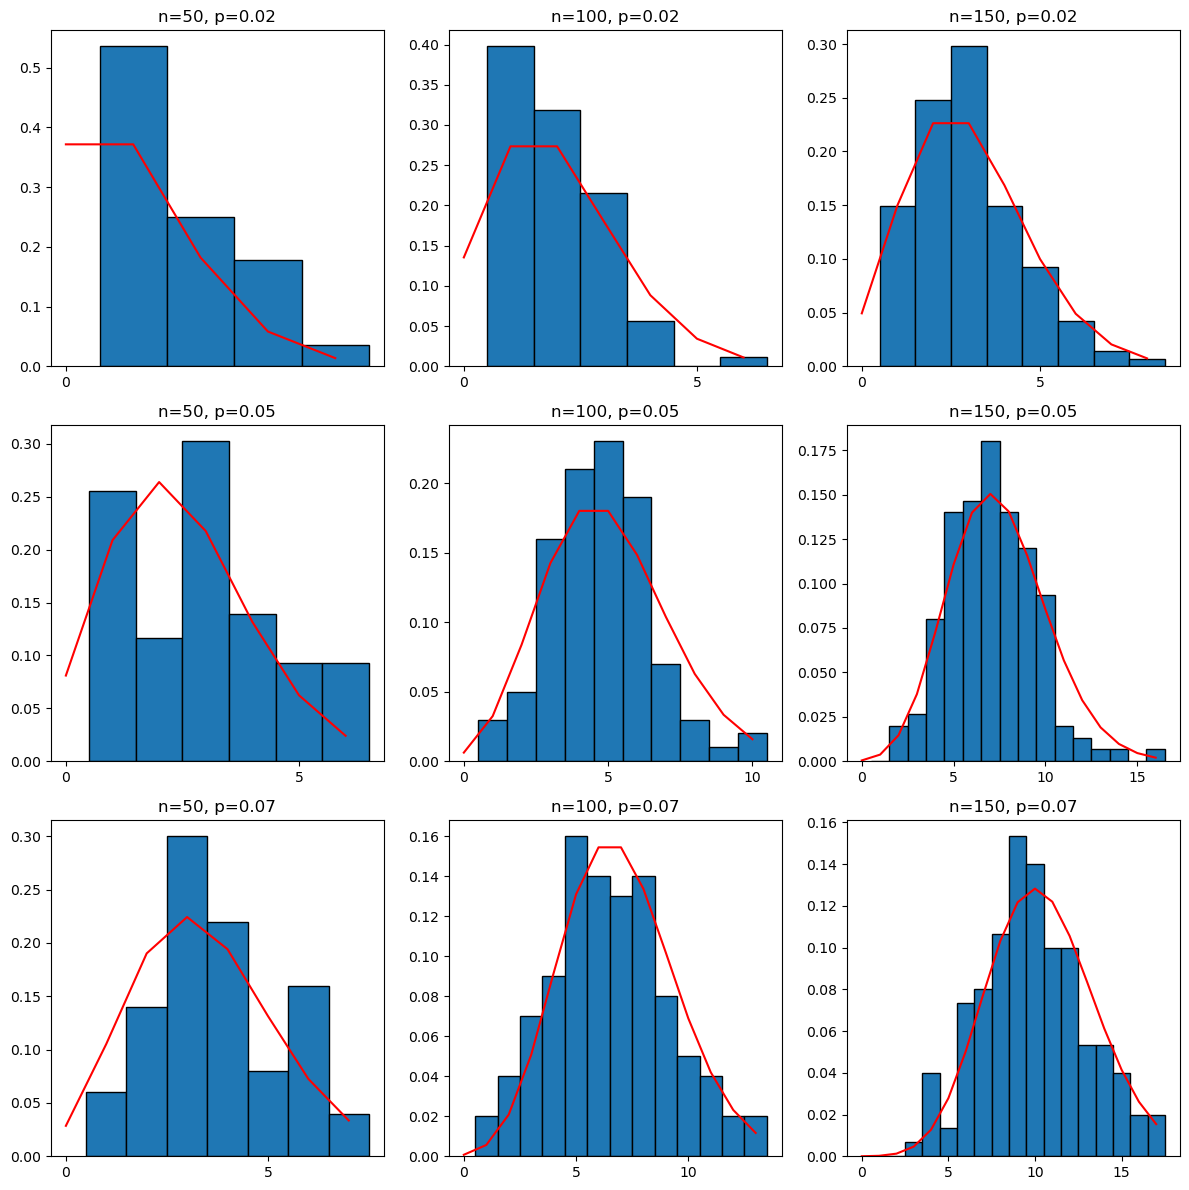

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the probability values and dimensions
probabilities = [0.02, 0.05, 0.07]
dimensions = [50, 100, 150]

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Iterate over rows (p values)
for i, p in enumerate(probabilities):
    # Iterate over columns (n values)
    for j, n in enumerate(dimensions):
        
        adjMatrix = np.zeros((n, n))
        randMatrix = np.random.uniform(low=0.0, high=1.0, size=(n, n))

        for k in range(n):
            for l in range(k + 1, n):  # fix index error
                if randMatrix[k, l] <= p:
                    adjMatrix[k, l] = 1
                    adjMatrix[l, k] = 1

        degrees = np.sum(adjMatrix, axis=1, dtype='int')
        degreeCounts = np.bincount(degrees)
        degreeCounts = degreeCounts[1:]

        # Theoretical calculation
        temp = [i for i in range(len(degreeCounts) + 1)]
        theoretical = [probabilityDistribution(f, n, p) for f in temp]

        axes[i, j].plot(temp, theoretical, 'r-')
        axes[i, j].hist(degrees, bins=np.arange(1, len(degreeCounts) + 2) - 0.5, edgecolor='black', density=True)
        axes[i, j].set_xticks(temp[::5])
        axes[i, j].set_title(f'n={n}, p={p}')

plt.tight_layout()
plt.show()


In [4]:
from scipy.special import comb

def probabilityDistribution1(k, n, p):
    coefficient = comb(n-1, k)
    probability = p ** k * (1 - p) ** (n - 1 - k)
    result = coefficient * probability
    return result

Text(0.5, 1.0, 'n=10000, p=0.01')

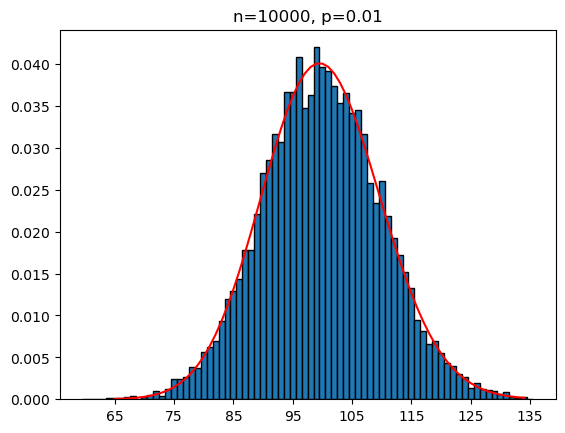

In [5]:
n = 10**4
p = 0.01

adjMatrix = np.zeros((n, n))
randMatrix = np.random.uniform(low=0.0, high=1.0, size=(n, n))

for k in range(n):
    for l in range(k + 1, n):  # fix index error
        if randMatrix[k, l] <= p:
            adjMatrix[k, l] = 1
            adjMatrix[l, k] = 1

degrees = np.sum(adjMatrix, axis=1, dtype='int')
degreeCounts = np.bincount(degrees)
degreeCounts = degreeCounts[1:]

# Theoretical calculation
temp = [i for i in range(len(degreeCounts) + 1)]
temp = temp[65:]
theoretical = [probabilityDistribution1(k, n, p) for k in temp]

bins = np.arange(60, len(degreeCounts) + 1) - 0.5
plt.plot(temp, theoretical, 'r-')
plt.xticks(temp[::10])
plt.hist(degrees, bins=bins, edgecolor='black', density=True)
plt.title(f'n={n}, p={p}')